In [127]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from keras.optimizers import Adam

In [128]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train: {x_train.shape}, y_train: {y_train.shape} , x_test: {x_test.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28), y_train: (60000,) , x_test: (10000, 28, 28), y_test: (10000,)


In [129]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
classes = { 0:"T-shirt/top(футболка)", 
            1: "Trouser(штани)",
            2: "Pullover(світер)",
            3: "Dress(плаття)",
            4: "Coat(пальто)",
            5: "shoes(туфлі)",
            6: "shirt(сорочка)",
            7: "sneakers(кросівки)",
            8: "bag(сумка)",
            9: "Ankle boot(чоботи)"}

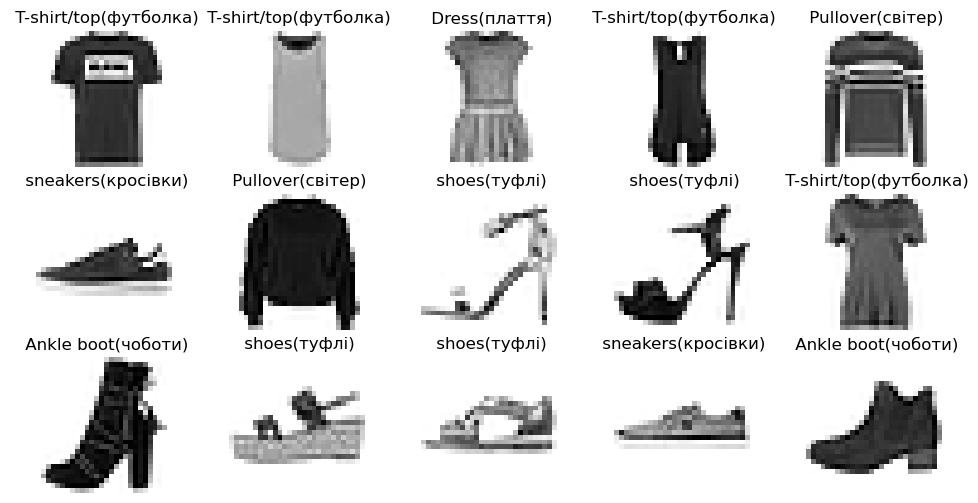

In [130]:

plt.figure(figsize=(12,6))
for i in range(1, 16):
  plt.subplot(3, 5, i-1 + 1)
  plt.imshow(x_train[i],  cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(f" {classes[y_train[i]]}")


In [131]:

# Преобразование размерности изображений

# Преобразуем из (28, 28) в (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 

# Преобразуем метки в категории 

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes) 

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (60000, 28, 28, 1), x_test: (10000, 28, 28, 1)
y_train: (60000, 10), y_test: (10000, 10)


In [132]:
x_train = tf.keras.layers.Concatenate()([x_train, x_train, x_train])
x_test = tf.keras.layers.Concatenate()([x_test, x_test, x_test]) 

print(  'train ', x_train.shape) 

train  (60000, 28, 28, 3)


In [133]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.fit(x_train)

validation_generator = test_datagen.fit(x_test)

In [134]:
train_generator = train_datagen.flow( x_train, y_train, batch_size=32) 
validation_generator = test_datagen.flow( x_test, y_test, batch_size=32)

In [135]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False
original_dim = (28, 28, 3) 
target_size = (32, 32)

In [136]:
model = models.Sequential([ 
                           layers.Input(original_dim), 
                           layers.Lambda(lambda image: tf.image.resize(image, target_size)),
                           conv_base, 
                           
                           layers.Flatten(), 
                           
                        #    layers.Dropout(0.3), 
                           layers.Dense(512, activation="relu", kernel_initializer="he_uniform"), 
                           
                           # layers.Dropout(0.3), 
                           layers.Dense(256, activation="relu"),
                           # layers.Dropout(0.3), 
                           
                           layers.Dense(10, activation="softmax"), ])

In [137]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_17 (Lambda)          (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 512)               0         
                                                                 
 dense_51 (Dense)            (None, 512)               262656    
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dense_53 (Dense)            (None, 10)                2570      
                                                                 
Total params: 15,111,242
Trainable params: 396,554
No

In [138]:
model.compile(  loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [126]:
# history = model.fit(train_generator, 
#                     epochs=10, 
#                     steps_per_epoch=150,
#                     validation_data=validation_generator, 
#                     validation_steps=64,
#                     batch_size=64,
#                     validation_split=0.2 ,
#                     shuffle=True)
history = model.fit(x_train, y_train, 
                    epochs=20, 
                    steps_per_epoch=150,
                    validation_steps=64,
                    batch_size=64,
                    validation_split=0.2 ,
                    shuffle=True)

Epoch 1/20
150/150 [==============================] - 10s 58ms/step - loss: 0.2523 - accuracy: 0.7304 - val_loss: 0.1243 - val_accuracy: 0.7930
Epoch 2/20
150/150 [==============================] - 8s 57ms/step - loss: 0.1128 - accuracy: 0.8029 - val_loss: 0.1090 - val_accuracy: 0.7988
Epoch 3/20
150/150 [==============================] - 8s 56ms/step - loss: 0.1009 - accuracy: 0.8132 - val_loss: 0.0937 - val_accuracy: 0.8220
Epoch 4/20
150/150 [==============================] - 9s 57ms/step - loss: 0.0934 - accuracy: 0.8248 - val_loss: 0.0915 - val_accuracy: 0.8213
Epoch 5/20
150/150 [==============================] - 8s 57ms/step - loss: 0.0849 - accuracy: 0.8398 - val_loss: 0.0850 - val_accuracy: 0.8306
Epoch 6/20
150/150 [==============================] - 8s 56ms/step - loss: 0.0733 - accuracy: 0.8549 - val_loss: 0.0837 - val_accuracy: 0.8323
Epoch 7/20
150/150 [==============================] - 8s 57ms/step - loss: 0.0735 - accuracy: 0.8565 - val_loss: 0.0822 - val_accuracy: 0.841

In [149]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

313/313 [==============================] - 9s 29ms/step - loss: 0.0808 - acc: 0.8415
Відсоток точності тестових даних:  84.15


In [140]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


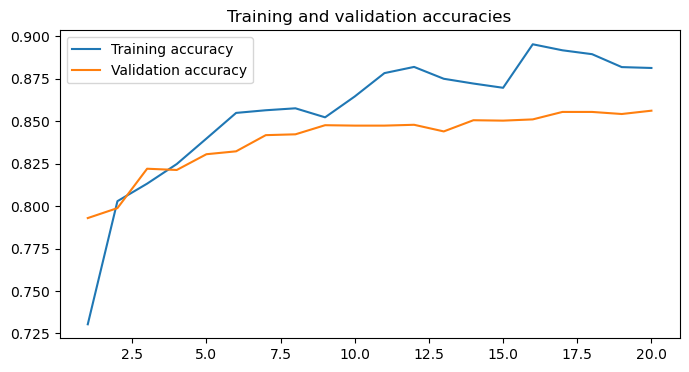

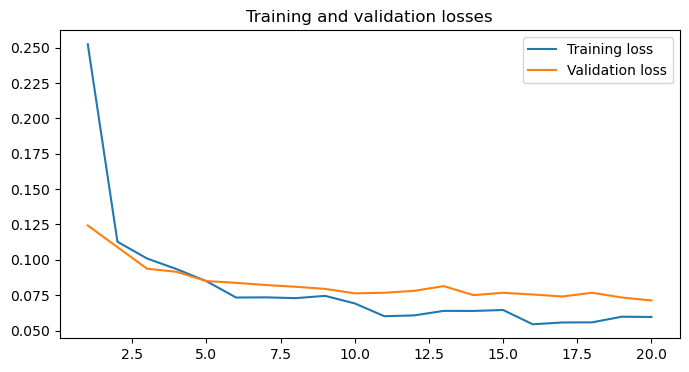

In [141]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [142]:
model.save("models/vgg16_basesd_model_3.hdf5")

In [143]:
# model = models.load_model("models/vgg16_basesd_model_3.hdf5")

Донавчання

In [144]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [145]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])


In [146]:
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["acc"]
)

history = model.fit(
    x_train,y_train,
    steps_per_epoch=150,
    epochs=10,
     verbose=1, batch_size=64, validation_split=0.2 
)
# history_modified = model.fit( x_train, y_train, epochs=5, verbose=1, batch_size=64, validation_split=0.2 )

Epoch 1/10
150/150 [==============================] - 14s 89ms/step - loss: 0.2944 - acc: 0.7168 - val_loss: 0.1386 - val_acc: 0.7832
Epoch 2/10
150/150 [==============================] - 13s 88ms/step - loss: 0.1221 - acc: 0.7967 - val_loss: 0.1132 - val_acc: 0.8040
Epoch 3/10
150/150 [==============================] - 13s 88ms/step - loss: 0.1009 - acc: 0.8152 - val_loss: 0.1040 - val_acc: 0.8146
Epoch 4/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0941 - acc: 0.8249 - val_loss: 0.0943 - val_acc: 0.8251
Epoch 5/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0864 - acc: 0.8344 - val_loss: 0.0865 - val_acc: 0.8329
Epoch 6/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0717 - acc: 0.8624 - val_loss: 0.0840 - val_acc: 0.8407
Epoch 7/10
150/150 [==============================] - 13s 88ms/step - loss: 0.0728 - acc: 0.8594 - val_loss: 0.0840 - val_acc: 0.8352
Epoch 8/10
150/150 [==============================] - 13s 88ms

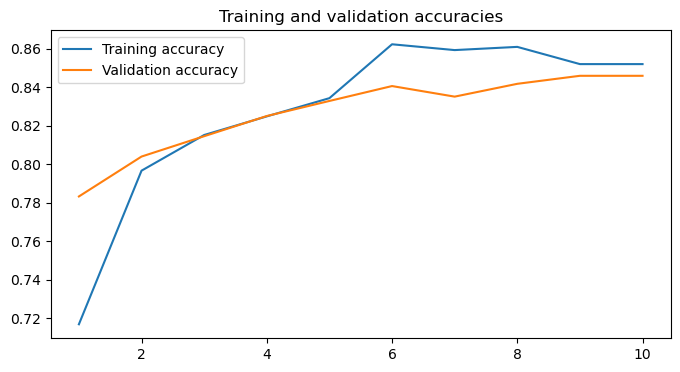

In [147]:
epochs = range(1, len(history.history["acc"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["acc"],   label="Training accuracy")
plt.plot(epochs, history.history["val_acc"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend()
plt.show()

In [148]:
result_test = model.evaluate(x_test, y_test)
# result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
# print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))


313/313 [==============================] - 9s 29ms/step - loss: 0.0808 - acc: 0.8415
Відсоток точності тестових даних:  84.15
